In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DATA CLEANING, PRE-PROCESSING AND FEATURE ENGINEERING

## TESTING DATASET

In [4]:
file = r'D:\Programmminggg\IP-TavLab\Dataset\Processed\Testing.csv'
df_test = pd.read_csv(file)
df_test.head()

,new_location_key,Date,Total tests,Total positives,Sum of RTPCRTests,Sum of RTPCRPos,Sum of AntigenTests,Sum of AntigenPos,Sum of CBNAATPos,Sum of CBNAATTests,Sum of OtherTest,Sum of OtherTestPos,Sum of TrueNATTests,Sum of TrueNATPos,Sum of TrueNATConfTests,Sum of TrueNATConfPos
0,AN_nicobars,2020-03-22,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,AN_nicobars,2020-04-06,5,0,5,0,0,0,0,0,0,0,0,0,0,0
2,AN_nicobars,2020-04-07,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,AN_nicobars,2020-04-10,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,AN_nicobars,2020-04-16,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Create a column 'Ratio' which is the ratio of 'Total positives' to 'Total tests'
df_test['Ratio'] = df_test['Total positives']/df_test['Total tests']

## VACCINATION DATASET

In [6]:
path2 = r'D:\Programmminggg\IP-TavLab\Dataset\Processed\Vaccination.csv'
df_vac = pd.read_csv(path2)
df_vac.head()

,Date,First Dose Administered,Second Dose Administered,Total Dose Administered,new_location_key
0,2021-01-16,5.0,0.0,5.0,HP_lahaul and spiti
1,2021-01-17,5.0,0.0,5.0,HP_lahaul and spiti
2,2021-01-18,4.0,0.0,4.0,HP_lahaul and spiti
3,2021-01-19,4.0,0.0,4.0,HP_lahaul and spiti
4,2021-01-20,4.0,0.0,4.0,HP_lahaul and spiti


Simplifying the Testing Dataset by dropping the columns that are not required for the analysis.

In [7]:
# Make a new df with only the columns new_location_key, Date, Total tests, Total positives
df_test2 = df_test[['new_location_key', 'Date', 'Total tests', 'Total positives', 'Ratio']]
df_test2.head()

,new_location_key,Date,Total tests,Total positives,Ratio
0,AN_nicobars,2020-03-22,1,0,0.0
1,AN_nicobars,2020-04-06,5,0,0.0
2,AN_nicobars,2020-04-07,1,0,0.0
3,AN_nicobars,2020-04-10,1,0,0.0
4,AN_nicobars,2020-04-16,1,0,0.0


## Merging the two datasets

In [8]:
# Merge the two dataframes, where Date and new_location_key are the same
df = pd.merge(df_test2, df_vac, on=['Date', 'new_location_key'])
df.head()


,new_location_key,Date,Total tests,Total positives,Ratio,First Dose Administered,Second Dose Administered,Total Dose Administered
0,AN_nicobars,2021-01-16,12,0,0.0,0.0,0.0,0.0
1,AN_nicobars,2021-01-17,10,0,0.0,0.0,0.0,0.0
2,AN_nicobars,2021-01-18,19,0,0.0,0.0,0.0,0.0
3,AN_nicobars,2021-01-19,16,0,0.0,1.0,0.0,1.0
4,AN_nicobars,2021-01-20,11,0,0.0,1.0,0.0,1.0


# TIME SERIES ANALYSIS

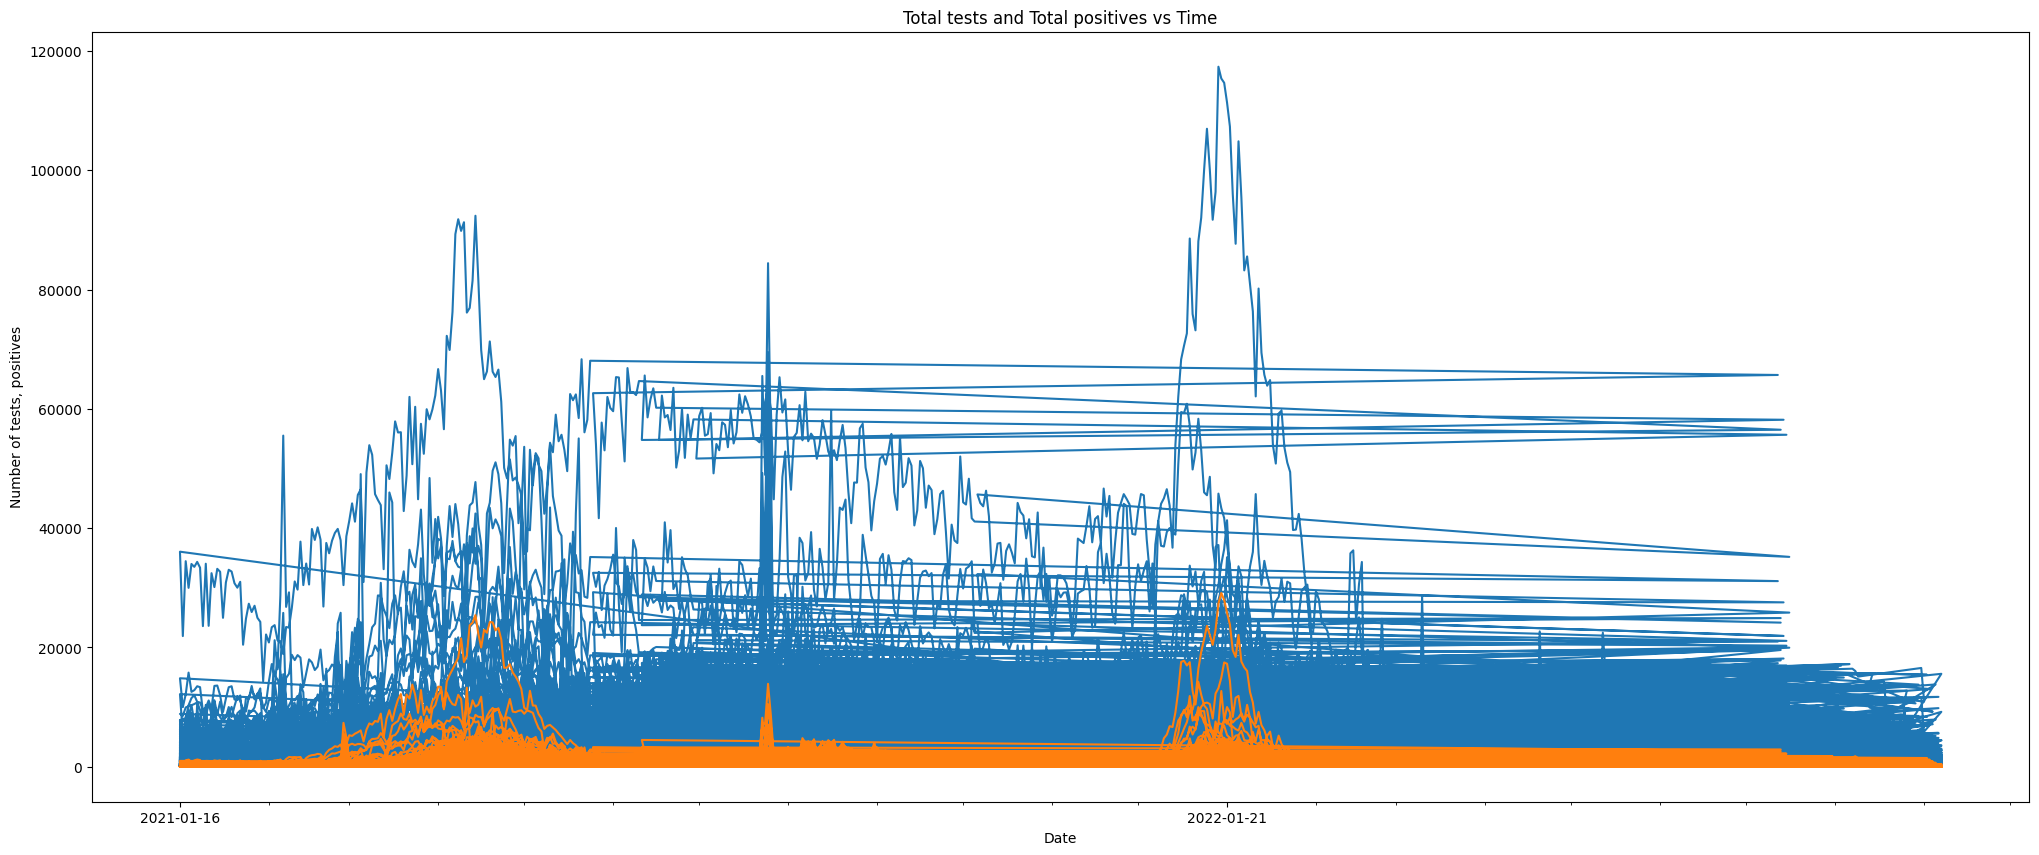

In [9]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(25, 10))
ax.set_xlabel('Date')
ax.set_ylabel('Number of tests, positives')
ax.set_title('Total tests and Total positives vs Time')
# ax.legend('Total tests', 'Total positives')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())

ax.plot(df['Date'], df['Total tests'], label='Total tests')
ax.plot(df['Date'], df['Total positives'], label='Total positives')

plt.show()

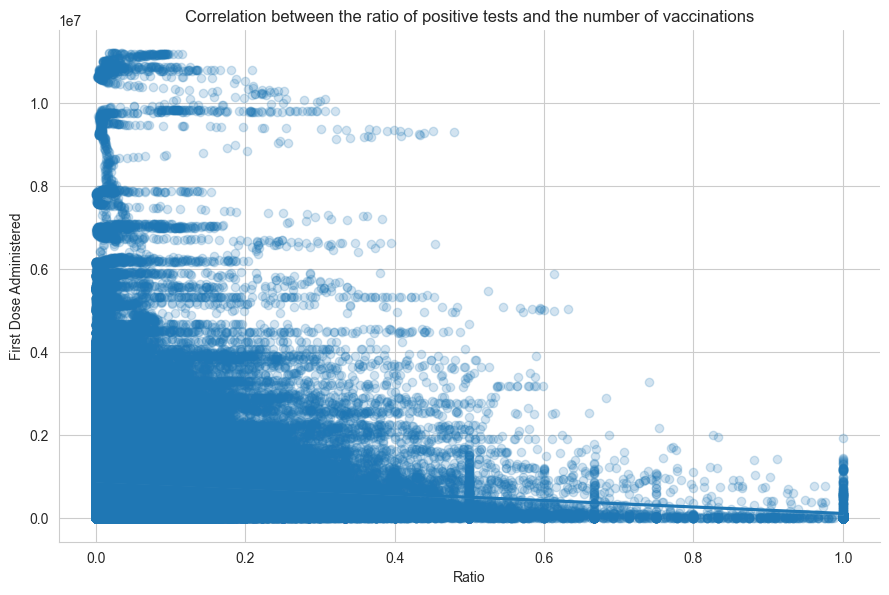

In [10]:
# Plotting the correlation between the ratio of positive tests and the number of vaccinations
sns.set_style('whitegrid')
sns.lmplot(x='Ratio', y='First Dose Administered', data=df, height=6, aspect=1.5, scatter_kws={'alpha':0.2})
plt.title('Correlation between the ratio of positive tests and the number of vaccinations')
plt.show()

In [ ]:
# Save the dataframe to a csv file 
df.to_csv(r'D:\Programmminggg\IP-TavLab\Dataset\Processed\Joint.csv', index=False)

# TIME SERIES DECOMPOSITION

## ACF and PACF Plots

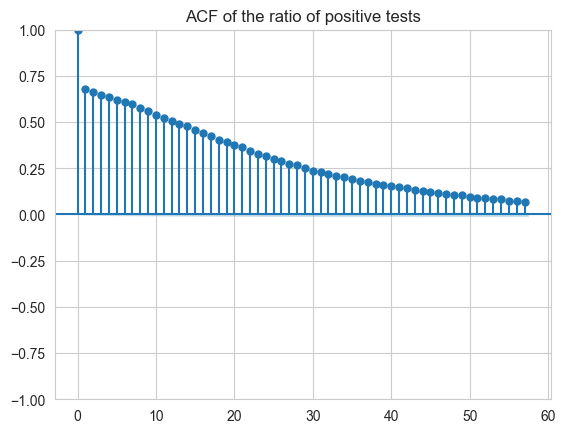

C:\Users\mishr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


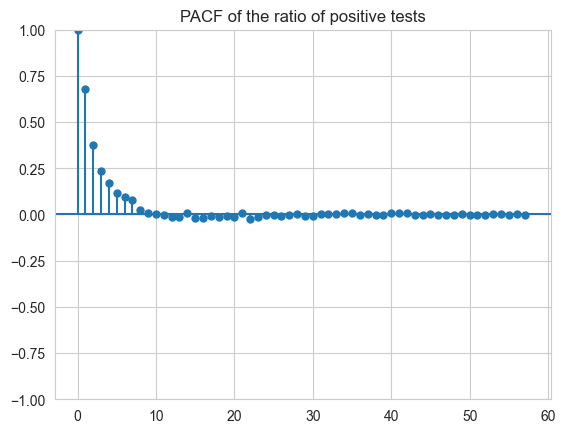

In [11]:
# Plot the ACF and PACF of the ratio of positive tests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Ratio'])
plt.title('ACF of the ratio of positive tests')
plt.show()
plot_pacf(df['Ratio'])
plt.title('PACF of the ratio of positive tests')
plt.show()

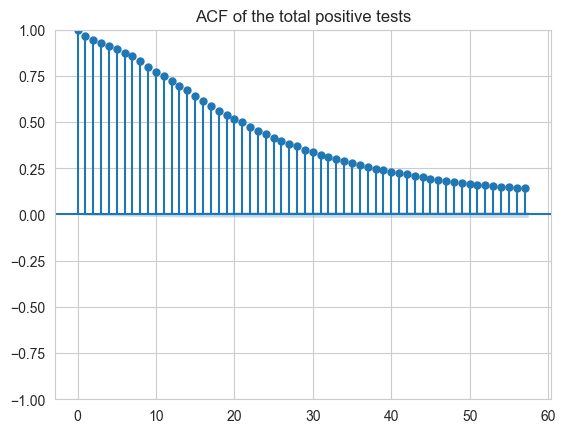

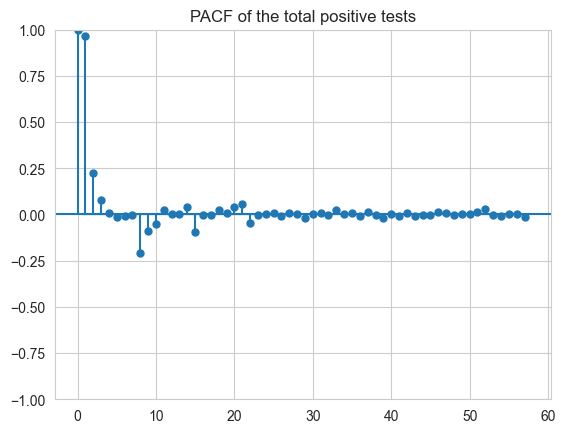

In [12]:
# Plot the ACF and PACF of the total positive tests
plot_acf(df['Total positives'])
plt.title('ACF of the total positive tests')
plt.show()
plot_pacf(df['Total positives'])
plt.title('PACF of the total positive tests')
plt.show()

C:\Users\mishr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axes\_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


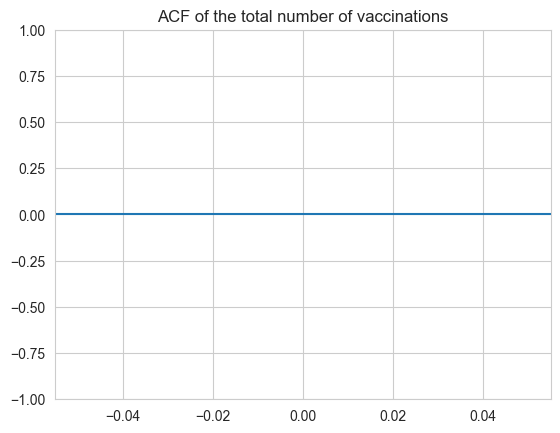

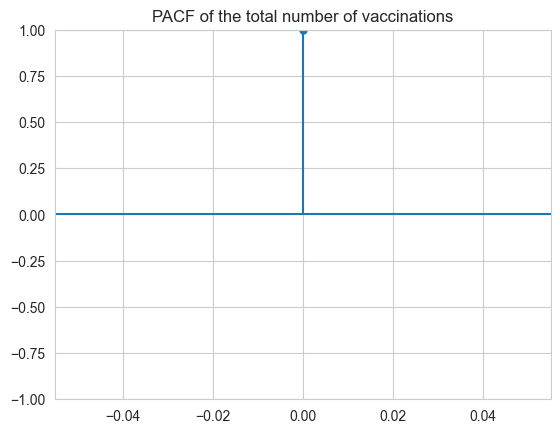

In [13]:
# Plot the ACF and PACF of the total number of vaccinations
plot_acf(df['Total Dose Administered'])
plt.title('ACF of the total number of vaccinations')
plt.show()
plot_pacf(df['Total Dose Administered'])
plt.title('PACF of the total number of vaccinations')
plt.show()

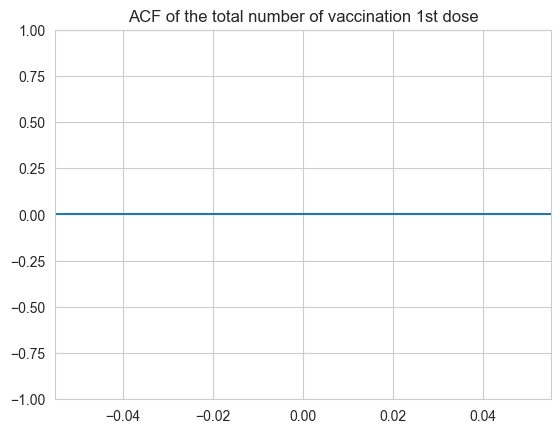

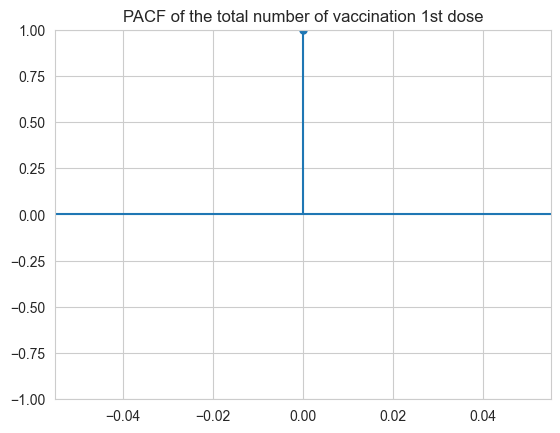

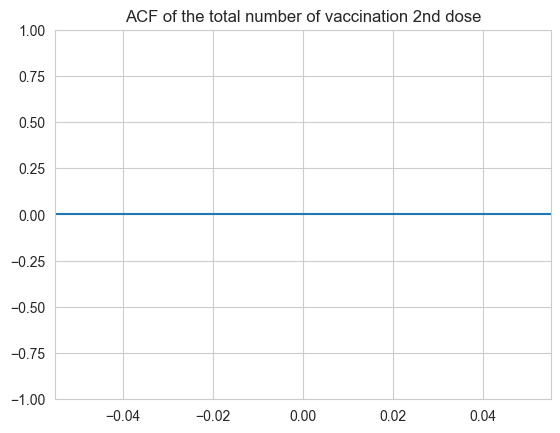

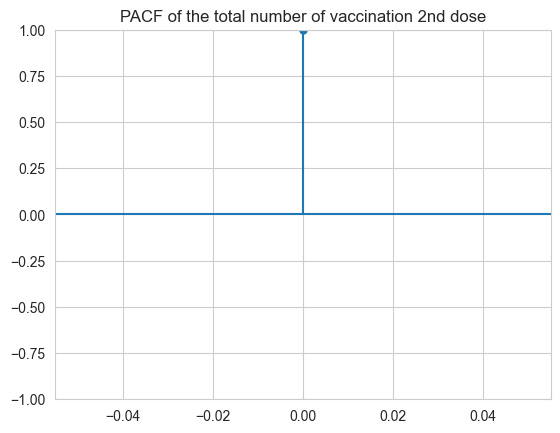

In [14]:
# Plot the ACF and PACF of the total number of vaccination 1st dose
plot_acf(df['First Dose Administered'])
plt.title('ACF of the total number of vaccination 1st dose')
plt.show()
plot_pacf(df['First Dose Administered'])
plt.title('PACF of the total number of vaccination 1st dose')
plt.show()

# Plot the ACF and PACF of the total number of vaccination 2nd dose
plot_acf(df['Second Dose Administered'])
plt.title('ACF of the total number of vaccination 2nd dose')
plt.show()
plot_pacf(df['Second Dose Administered'])
plt.title('PACF of the total number of vaccination 2nd dose')
plt.show()

## Time Series Decomposition using STL

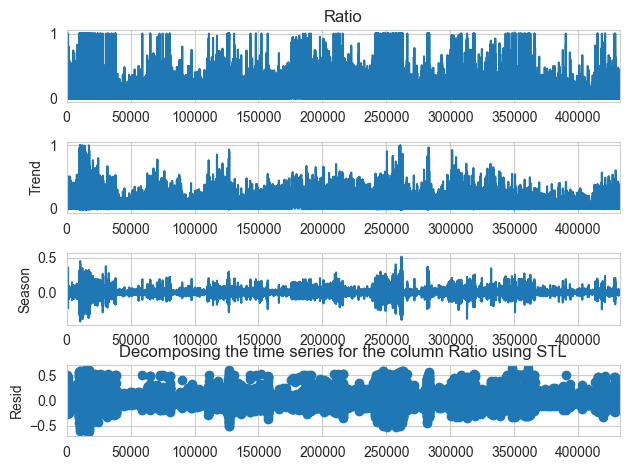

In [15]:
# Decomposing the time series for the column 'Ratio' using STL
from statsmodels.tsa.seasonal import STL

Ratio_stl = STL(df['Ratio'], period=3)
res = Ratio_stl.fit()
fig = res.plot()
plt.title('Decomposing the time series for the column Ratio using STL')
plt.show()

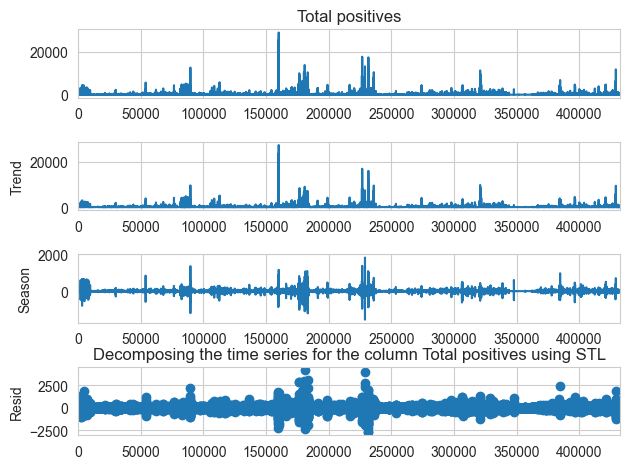

In [16]:
# Decomposing the time series for the column 'Total positives' using STL
Total_positives_stl = STL(df['Total positives'], period=3)
res = Total_positives_stl.fit()
fig = res.plot()
plt.title('Decomposing the time series for the column Total positives using STL')
plt.show()

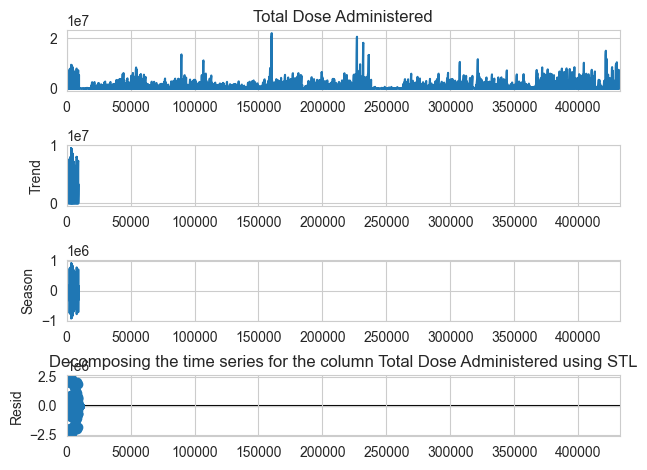

In [17]:
# Decomposing the time series for the column 'Total Dose Administered' using STL
Total_Dose_Administered_stl = STL(df['Total Dose Administered'], period=3)
res = Total_Dose_Administered_stl.fit()
fig = res.plot()
plt.title('Decomposing the time series for the column Total Dose Administered using STL')
plt.show()

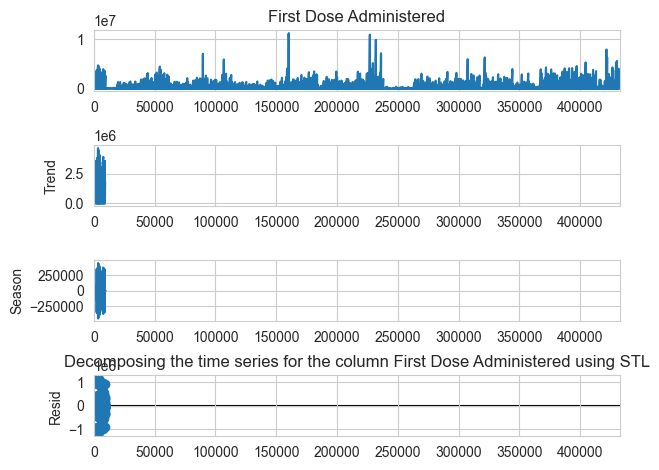

In [18]:
# Decomposing the time series for the column 'First Dose Administered' using STL
First_Dose_Administered_stl = STL(df['First Dose Administered'], period=3)
res = First_Dose_Administered_stl.fit()
fig = res.plot()
plt.title('Decomposing the time series for the column First Dose Administered using STL')
plt.show()

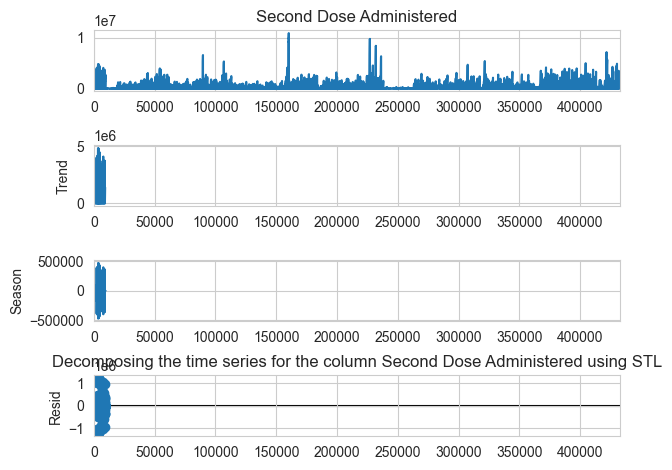

In [19]:
# Decomposing the time series for the column 'Second Dose Administered' using STL
Second_Dose_Administered_stl = STL(df['Second Dose Administered'], period=3)
res = Second_Dose_Administered_stl.fit()
fig = res.plot()
plt.title('Decomposing the time series for the column Second Dose Administered using STL')
plt.show()